# Gaussian Maximum Likelihood

##  MLE of a  Gaussian $p_{model}(x|w)$

You are given an array of data points called `data`. Your course site plots the negative log-likelihood  function for several candidate hypotheses. Estimate the parameters of the Gaussian $p_{model}$ by  coding an implementation that estimates its optimal parameters (15 points) and explaining what it does (10 points). You are free to use any Gradient-based optimization method you like.  

MEAN: 6.214285714285714
STANDARD DEVIATION: 2.425418120907092


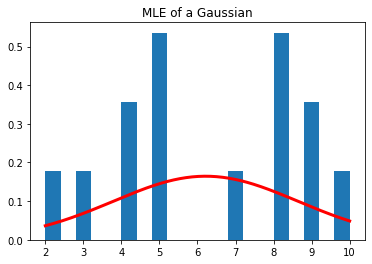

In [65]:
import numpy as np
import matplotlib.pyplot as plt
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
mu = np.mean(data)# mean
sigma = np.std(data) #standard dev.
eta = 0.01 #learning rate
threshold = 0.000001 #value to stop the iteration for 
delta = np.inf #value to keep the loop going and stops when it meets the threshold value and goes below it
while delta > threshold:
    GradientMu = np.sum(mu - data) / sigma**2 #deriv of negative log-likelihood function with respect to the graident mu value
    GradientSigma = (np.sum((data - mu)**2) - len(data)*sigma**2) / (sigma**3)#deriv of negative log-likelihood function with respect to the graident sigma value
    newMu = mu - eta * GradientMu #new mu value after deriv value
    newSigma = sigma - eta * GradientSigma #new sigma value after deriv value
    delta = np.abs(newMu - mu) + np.abs(newSigma - sigma) #change delta for loop iteration of new difference between old and new mu and sigma
    mu = newMu #change the inital mu value
    sigma = newSigma #change the inital sigma value
print("MEAN:", mu)
print("STANDARD DEVIATION:", sigma)
x = np.linspace(np.min(data), np.max(data), 200)# 200 evenly spaced numbers between 2-10
pdf = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x - mu)/sigma)**2)# PDF with new sigma and mu values
plt.hist(data, density=True, bins=20)
plt.plot(x, pdf, 'r-', lw=3)
plt.title('MLE of a Gaussian')
plt.show()

## MLE of a conditional Gaussian $p_{model}(y|x,w)$

You are given a problem that involves the relationship between $x$ and $y$. Estimate the parameters of a $p_{model}$ that fit the dataset (x,y) shown below.   You are free to use any Gradient-based optimization method you like.  


SLOPE:  0.7722026962628957
Y-INTERCEPT:  0.019162039601876207


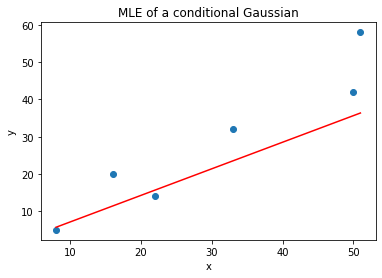

In [66]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])
m=0 #inital slope
b=0 #initial y-intercept
eta=0.0001 #learning rate
epochs=1000 #number of interations
n= float(len(x)) #number of elements of x which is 6 in this case
#gradient descent algorithm process
for i in range(len(x)):
  yPred=m*x+b #predicted value of y; is mx+b formula 
  derivM=(-2/n)*sum(x*(y-yPred)) # partial deriv. with respect to slope: -2/n* summation from i=0 to n of intial x(inital y- predicted y)
  derivB=(-2/n)*sum(y-yPred) #partial deriv. with respect to the y-intercept: -2/n* summation from i=0 to n of (inital y- predicted y)
  m=m-eta*derivM #new slope calculated using the deriv.
  b=b-eta*derivB #new y-intercept calculated using the deriv.
print("SLOPE: ",m)
print("Y-INTERCEPT: ", b)
plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(yPred),max(yPred)],color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLE of a conditional Gaussian')
plt.show()